In [1]:
import numpy as np
import os
import fileinput
import sys
import pandas as pd
import matplotlib.pyplot as plt

from utilities.foam_automation.caserunner import run_until_convergence, get_endtime

#from utilities.foam_automation.error import mseU_2Dxy
#from utilities.foam_automation.error import mseU_2Dmag
#from utilities.foam_automation.error import mseU_2Dmag_relcoeff
#from utilities.foam_automation.error import mseU_2Dmagrel_krel_relcoeff
from utilities.foam_automation.computeFoamLossFunc import computeFoamFieldLossFunc

from utilities.foam_automation.set_foam_coeff import set_foam_coef

from utilities.json_io import write_suggestion, load_coeff_default, load_coeff_bounds, load_history_to_dict, load_suggestion

from utilities.control import initialize
from update_history import register_score
from suggest_coeffs import suggest


# Grid search (completed)

In [2]:
a1_vec = np.around(np.linspace(0.15,0.8,300),4)
history_directory = 'foam/gridsearch_a1_phll/tuner'

In [ ]:
# Run simulation loop (already run)
for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    os.system(f'cp -r foam/gridsearch_a1_phll/case_1p0_template {casedir}')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    set_foam_coef(casedir,search_point)
    #Uncomment to run
    #last_time = run_until_convergence(case = casedir, n_proc = 16)
    

In [6]:
# Calculate errors loop

ref_df = pd.read_csv('foam/gridsearch_a1_phll/tuner/refdata.csv')

initialize(directory = history_directory,
           coeff_bounds = {'a1':[min(a1_vec),max(a1_vec)]},
           coeff_default = {'a1': 0.31},
           restart = True)

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    register_score(score=score1, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_mse_U_componentwise_2Dxy.json')}")

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    register_score(score=score2, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_mse_U_magnitude_2Dxy.json')}")

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    register_score(score=score3, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean.json')}")

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    register_score(score=score4, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean.json')}")

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    register_score(score=score5, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean.json')}")

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    register_score(score=score6, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')}")


Saving coeff_bounds to foam/gridsearch_a1_phll/tuner/coeff_bounds.json
Saving coeff_default to foam/gridsearch_a1_phll/tuner/coeff_default.json
Removing old history and suggestion files....
Could not remove a file, it might not exist to start....
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
No history file exists at foam/gridsearch_a1_phll/tuner/history.json, creating and registering first point
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/hist

0

In [117]:
for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    foamLoss = computeFoamFieldLossFunc(foamdir=casedir,
                                        ref_df=ref_df,
                                        interp_method='nearest')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    last_time = get_endtime(case=casedir)
    score1 = -foamLoss.foam_mse_U_componentwise_2Dxy(foamtime=last_time)
    score2 = -foamLoss.foam_mse_U_magnitude_2Dxy(foamtime=last_time)
    score3 = -foamLoss.foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score4 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score5 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory))
    score6 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k(foamtime=last_time)
    score8 = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                    coeff_dict=search_point,
                                                                    coeff_default=load_coeff_default(directory=history_directory),lda=0.25)
    register_score(score=score8, 
                   directory = history_directory)
os.system(f"mv {os.path.join(history_directory,'history.json')} {os.path.join(history_directory,'history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p25.json')}")

Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
No history file exists at foam/gridsearch_a1_phll/tuner/history.json, creating and registering first point
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_

0

# Load grid search results

In [4]:
def load_history(historyfile):
    history = load_history_to_dict(history_directory,historyfile)
    param = [d['params']['a1'] for d in history]
    target = [d['target'] for d in history]  
    return param, target

# Bayesian optimization

In [ ]:
# Run simulation loop
foamdir = '/home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter'
tunerdir = os.path.join(foamdir,'tuner')
iterations=20
ref_df = pd.read_csv(os.path.join(tunerdir,'refdata.csv'))
initialize(directory = tunerdir,
           coeff_bounds = None,
           coeff_default = None,
           restart = True)

foamLoss = computeFoamFieldLossFunc(foamdir=foamdir,
                                    ref_df=ref_df,
                                    interp_method='nearest')
                                
for i in range(iterations):
    if i == 0:
        search_point = load_coeff_default(directory=tunerdir)
        write_suggestion(directory=tunerdir, suggestion=search_point)
    else:
        suggest(directory=tunerdir,
                           random_state=7)
        search_point = load_suggestion(directory=tunerdir)
    print(search_point)
    set_foam_coef(foamdir,search_point)
    last_time = run_until_convergence(case=foamdir, n_proc = 16)
    score = -foamLoss.foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean(foamtime=last_time,
                                                                            coeff_dict=search_point,
                                                                            coeff_default=load_coeff_default(directory=tunerdir),lda=0.25)   

    register_score(score=score, directory=tunerdir)
    

Did not get coefficient bounds dict for initialization, assuming coeff_bounds.json exists in /home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter/tuner
Did not get coefficient default dict for initialization, assuming coeff_default.json exists in /home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter/tuner or is not needed
Removing old history and suggestion files....
Could not remove a file, it might not exist to start....
Saving suggestion to /home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter/tuner/suggestion.json
{'a1': 0.31}
No history file exists at /home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter/tuner/history.json, creating and registering first point
Registering score in /home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter/tuner/history.json
Saving suggestion to /home/ryley/WDK/ML/rans_tuner/foam/bayesian_a1_phll/case_1p0_lda0p25_20iter/tuner/suggestion.json
{'

# Analysis and plotting

## Comparison of loss functions

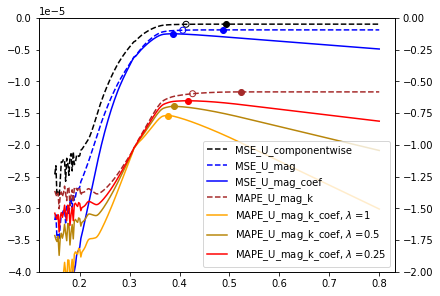

In [137]:
#x_comp = load_history('history_foam_mse_U_componentwise_2Dxy.json')[0]
#y_comp = load_history('history_foam_mse_U_componentwise_2Dxy.json')[1]
#print(x_comp)
#print(y_comp)

def get_max_xy(historyfile):
    x,y = load_history(historyfile)
    ind = np.argmax(y)
    return x[ind],y[ind]

def get_percent_xy(historyfile):
    x,y = load_history(historyfile)
    y_find = max(y)-abs(max(y))*0.025
    difference_array = abs(np.asarray(y) - y_find)
    ind = np.argmin(difference_array)
    return x[ind],y[ind]

fig, ax1 = plt.subplots(constrained_layout=True)
ax2 = ax1.twinx()

ax1.plot(load_history('history_foam_mse_U_componentwise_2Dxy.json')[0],
         load_history('history_foam_mse_U_componentwise_2Dxy.json')[1],
         'k--',
         label='MSE_U_componentwise')
ax1.scatter(x = get_max_xy('history_foam_mse_U_componentwise_2Dxy.json')[0],
            y = get_max_xy('history_foam_mse_U_componentwise_2Dxy.json')[1],
            c='k')

ax1.scatter(x = get_percent_xy('history_foam_mse_U_componentwise_2Dxy.json')[0],
            y = get_percent_xy('history_foam_mse_U_componentwise_2Dxy.json')[1],
            facecolors='none', edgecolors='k')

ax1.plot(load_history('history_foam_mse_U_magnitude_2Dxy.json')[0],
         load_history('history_foam_mse_U_magnitude_2Dxy.json')[1],
         'b--',
         label='MSE_U_mag')
ax1.scatter(x = get_max_xy('history_foam_mse_U_magnitude_2Dxy.json')[0],
            y = get_max_xy('history_foam_mse_U_magnitude_2Dxy.json')[1],
            c='b')
ax1.scatter(x = get_percent_xy('history_foam_mse_U_magnitude_2Dxy.json')[0],
            y = get_percent_xy('history_foam_mse_U_magnitude_2Dxy.json')[1],
            facecolors='none', edgecolors='b')

ax1.plot(load_history('history_foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean.json')[0],
         load_history('history_foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean.json')[1],
         label='MSE_U_mag_coef',c='b')
ax1.scatter(x = get_max_xy('history_foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean.json')[0],
            y = get_max_xy('history_foam_multi_mse_U_magnitude_2Dxy_relcoeff_mean.json')[1],
            c='b')


ax2.plot(load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')[0],
         load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')[1],
         'brown',linestyle='dashed',
         label='MAPE_U_mag_k')

ax2.scatter(x = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')[0],
            y = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')[1],
            c='brown')
ax2.scatter(x = get_percent_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')[0],
            y = get_percent_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k.json')[1],
            facecolors='none', edgecolors='brown')

ax2.plot(load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean.json')[0],
         load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean.json')[1],
         'orange',
         label=r'MAPE_U_mag_k_coef, $\lambda$ =1')
ax2.scatter(x = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean.json')[0],
            y = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean.json')[1],
            c='orange')

ax2.plot(load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p5.json')[0],
         load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p5.json')[1],
         'darkgoldenrod',
         label=r'MAPE_U_mag_k_coef, $\lambda$ =0.5')
ax2.scatter(x = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p5.json')[0],
            y = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p5.json')[1],
            c='darkgoldenrod')

ax2.plot(load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p25.json')[0],
         load_history('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p25.json')[1],
         'red',
         label=r'MAPE_U_mag_k_coef, $\lambda$ =0.25')
ax2.scatter(x = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p25.json')[0],
            y = get_max_xy('history_foam_multi_mape_U_magnitude_2Dxy_mape_k_relcoeff_mean_lda0p25.json')[1],
            c='red')

ax1.set_ylim([-0.000040,0])
ax2.set_ylim([-2,0])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=4)


In [60]:
param_relUkc,target_relUkc = load_history('history_relUkc.json')
param_relUkc,target_relUkc = load_history('history_relUkc.json')

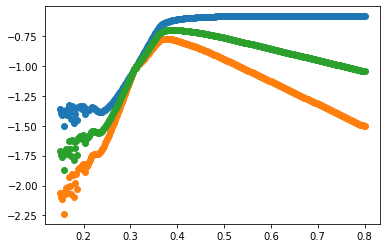

In [5]:

plt.scatter(param_relUk,target_relUk,label='relUk')
plt.scatter(param_relUkc,target_relUkc,label='relUkc')
plt.scatter(param_relUkc05,target_relUkc05,label='relUkc05')

#print(target_comp[0:5])
#print(target_mag[0:5])
#print(target_mag)

In [17]:
def print_bare_goals_at_selected(ind):
    print(f'Point sel: {param_comp[ind]}')
    print(f'relUk max: {target_relUk[ind]}') 
    print(f'error mag: {target_mag[ind]}') 

print('relUk max:')
print_bare_goals_at_selected(np.argmax(target_relUk))

print('Error max max:')
print_bare_goals_at_selected(np.argmax(target_mag))

print('rel1:')
print_bare_goals_at_selected(np.argmax(target_rel1))

print('rel2:')
print_bare_goals_at_selected(np.argmax(target_rel2))

print('relUkc:')
print_bare_goals_at_selected(np.argmax(target_relUkc))

print('relUkc05')
print_bare_goals_at_selected(np.argmax(target_relUkc05))


relUk max:
Point sel: 0.5239
relUk max: -0.583446843127357
error mag: -1.9043332771432456e-06
Error max max:
Point sel: 0.487
relUk max: -0.5850325132177929
error mag: -1.9029594592617798e-06
rel1:
Point sel: 0.387
relUk max: -0.6201985266448174
error mag: -2.0137207480104776e-06
rel2:
Point sel: 0.3761
relUk max: -0.634919507648456
error mag: -2.0907158259925327e-06
relUkc:
Point sel: 0.3761
relUk max: -0.634919507648456
error mag: -2.0907158259925327e-06
relUkc05
Point sel: 0.3891
relUk max: -0.6182589673434529
error mag: -2.004407892737836e-06


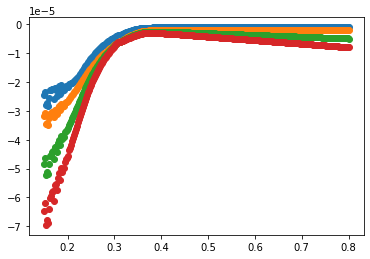

In [7]:
import matplotlib.pyplot as plt

plt.scatter(param_comp,target_comp,label='comp')
plt.scatter(param_mag,target_mag,label='mag')
plt.scatter(param_rel1,target_rel1,label='rel1')
plt.scatter(param_rel2,target_rel2,label='rel2')

#print(target_comp[0:5])
#print(target_mag[0:5])
#print(target_mag)

In [20]:
import pprint
pprint.pprint(history)

[{'datetime': {'datetime': '2022-06-02 19:11:22', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.15},
  'target': 2.466547322840756e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:22', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1522},
  'target': 2.3300893836578992e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:23', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1543},
  'target': 2.7916139904196577e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:23', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1565},
  'target': 2.7443275276943687e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:23', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1587},
  'target': 2.8174783522166515e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:24', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1609},
  'target': 2.5641766501330933e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:24', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.163},
  'target': 2.26785

In [24]:
print(param)

[0.15, 0.1522, 0.1543, 0.1565, 0.1587, 0.1609, 0.163, 0.1652, 0.1674, 0.1696, 0.1717, 0.1739, 0.1761, 0.1783, 0.1804, 0.1826, 0.1848, 0.187, 0.1891, 0.1913, 0.1935, 0.1957, 0.1978, 0.2, 0.2022, 0.2043, 0.2065, 0.2087, 0.2109, 0.213, 0.2152, 0.2174, 0.2196, 0.2217, 0.2239, 0.2261, 0.2283, 0.2304, 0.2326, 0.2348, 0.237, 0.2391, 0.2413, 0.2435, 0.2457, 0.2478, 0.25, 0.2522, 0.2543, 0.2565, 0.2587, 0.2609, 0.263, 0.2652, 0.2674, 0.2696, 0.2717, 0.2739, 0.2761, 0.2783, 0.2804, 0.2826, 0.2848, 0.287, 0.2891, 0.2913, 0.2935, 0.2957, 0.2978, 0.3, 0.3022, 0.3043, 0.3065, 0.3087, 0.3109, 0.313, 0.3152, 0.3174, 0.3196, 0.3217, 0.3239, 0.3261, 0.3283, 0.3304, 0.3326, 0.3348, 0.337, 0.3391, 0.3413, 0.3435, 0.3457, 0.3478, 0.35, 0.3522, 0.3543, 0.3565, 0.3587, 0.3609, 0.363, 0.3652, 0.3674, 0.3696, 0.3717, 0.3739, 0.3761, 0.3783, 0.3804, 0.3826, 0.3848, 0.387, 0.3891, 0.3913, 0.3935, 0.3957, 0.3978, 0.4, 0.4022, 0.4043, 0.4065, 0.4087, 0.4109, 0.413, 0.4152, 0.4174, 0.4196, 0.4217, 0.4239, 0.4261, 0